In [1]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import shap
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
shap.initjs()
import lime
import lime.lime_tabular
import matplotlib.pylab as pl
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Read the file in.

In [2]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',header = 1)

In [3]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [4]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
y = df['default payment next month']
df = df.drop(['default payment next month','ID'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=42)

In [7]:
xgb_model = XGBClassifier(learning_rate = 0.05, verbosity = 1, n_estimators = 200
                         ,scale_pos_weight =4, random_state = 2456 )
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2456,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, seed=None,
              silent=None, subsample=1, verbosity=1)

In [8]:
y_pred = xgb_model.predict(X_test)
roc_auc_score(y_test,y_pred)

0.7100378597377881

In [9]:
accuracy_score(y_test, y_pred)

0.732

In [10]:
confusion_matrix(y_test, y_pred)

array([[3511, 1176],
       [ 432,  881]], dtype=int64)

## Global Feature Importance Plots

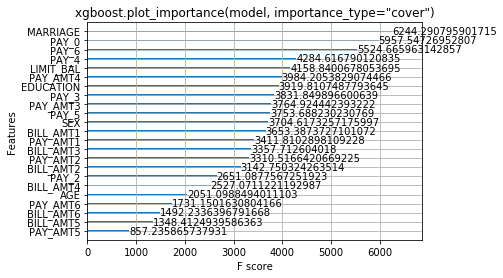

In [11]:
xgb.plot_importance(xgb_model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

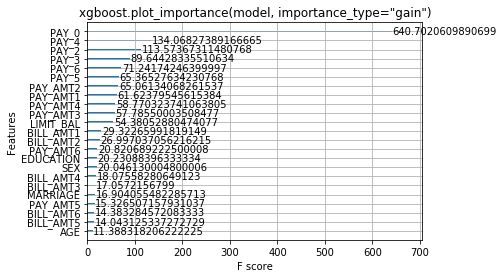

In [12]:
xgb.plot_importance(xgb_model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [13]:
shap_values = shap.TreeExplainer(xgb_model).shap_values(X_test)

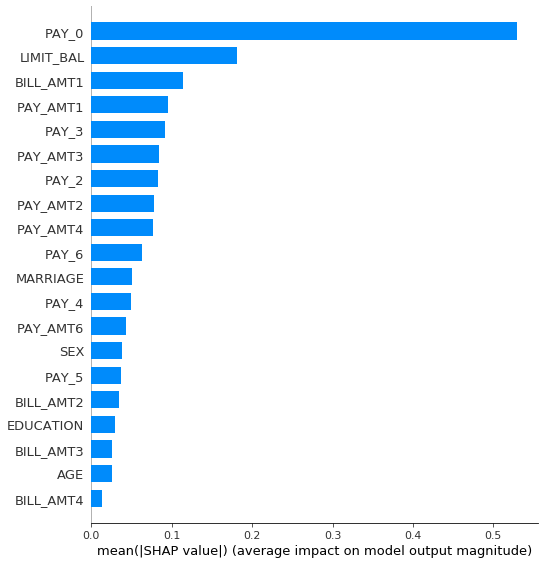

In [14]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

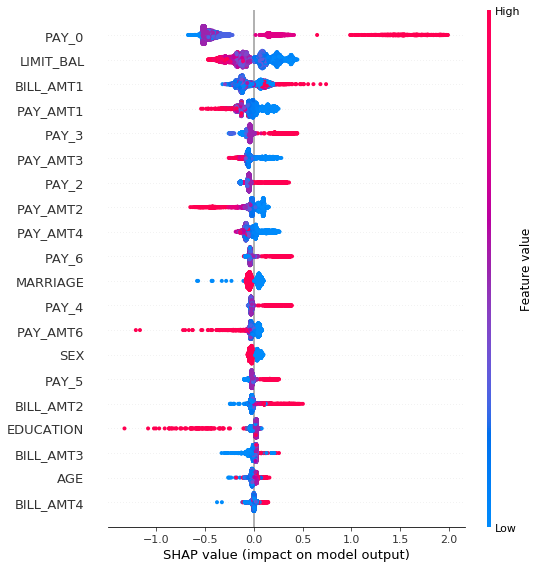

In [15]:
shap.summary_plot(shap_values, X_test)

## Local Importance

In [16]:
### Lets Study Specific Example
observation_1 = 13
observation_2 = 1

select = range(20)
features = X_test.iloc[select]
features_display = X_test.loc[features.index]

### SHAP

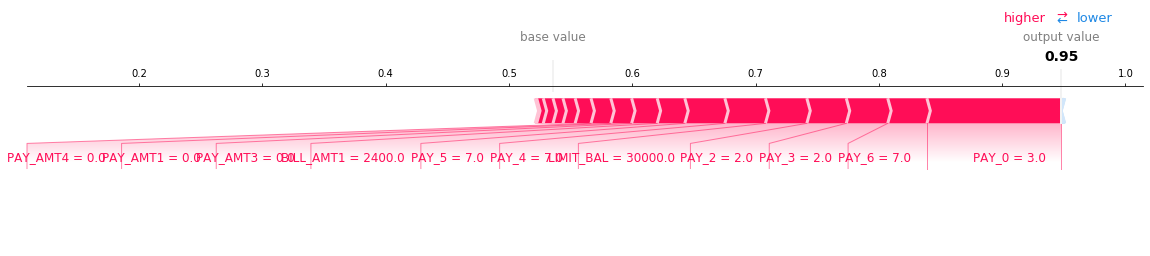

In [17]:
explainer = shap.TreeExplainer(xgb_model)
expected_value = explainer.expected_value
shap.force_plot(expected_value, shap_values[observation_1],features_display.iloc[observation_1] ,X_test.columns,link='logit', matplotlib=True)

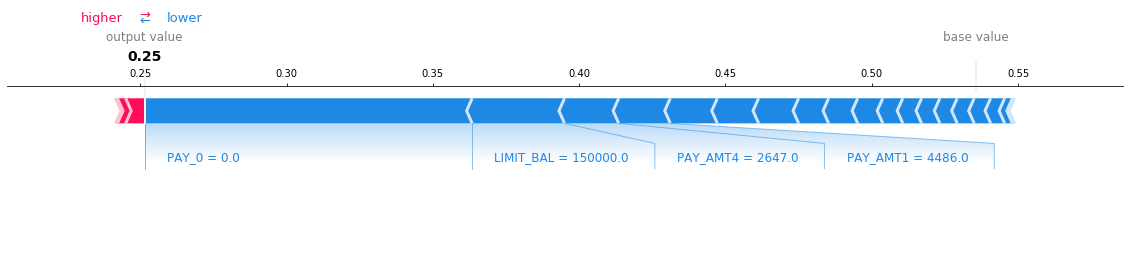

In [18]:
shap.force_plot(expected_value, shap_values[observation_2],features_display.iloc[observation_2],X_test.columns,link='logit', matplotlib=True)

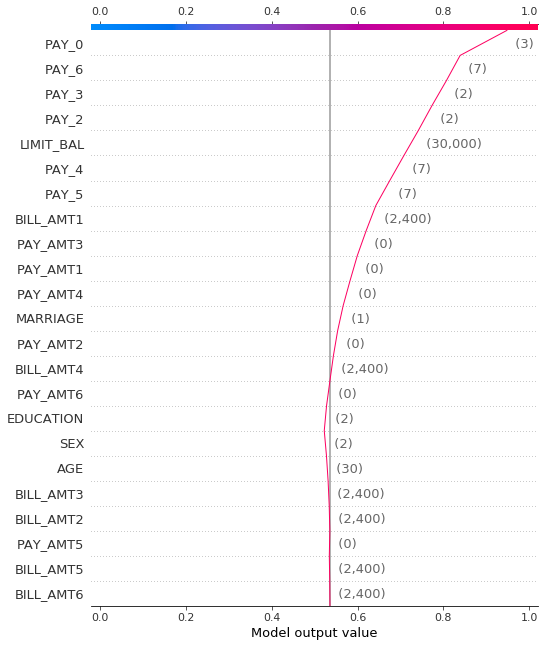

In [19]:
shap.decision_plot(expected_value, shap_values[observation_1],features_display.iloc[observation_1] ,feature_display_range=slice(None, -31, -1), link = 'logit')

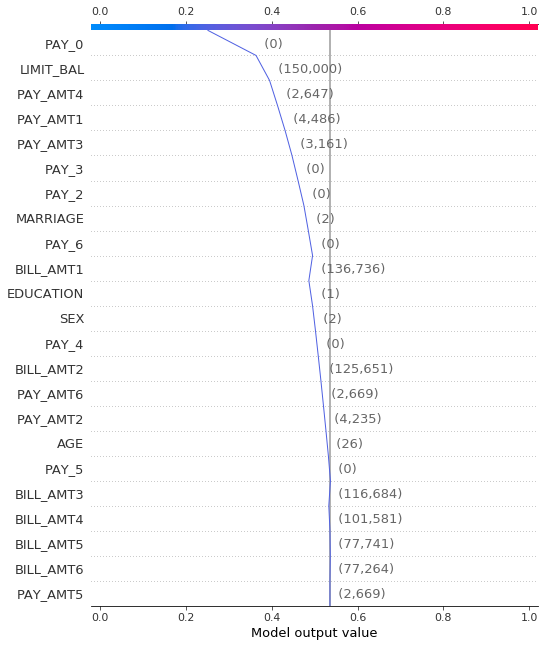

In [20]:
shap.decision_plot(expected_value, shap_values[observation_2], features_display.iloc[observation_2], feature_display_range=slice(None, -31, -1), link = 'logit')

### LIME

In [21]:
xgb_model.fit(X_train.as_matrix(), y_train)

C:\Users\nanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2456,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
predict_fn_xgb = lambda x: xgb_model.predict_proba(x).astype(float)

In [23]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), feature_names = X_train.columns)

In [24]:
X_test = X_test[X_train.columns]

In [25]:
exp = explainer.explain_instance(X_test.to_numpy()[observation_1], predict_fn_xgb, num_features = 9)
exp.show_in_notebook()

In [26]:
exp = explainer.explain_instance(X_test.to_numpy()[observation_2], predict_fn_xgb, num_features = 9)
exp.show_in_notebook()

## Interpret GA2M Interpretable model EBM

In [27]:
from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier(scoring = 'auc')
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(binning_strategy='uniform', data_n_episodes=2000,
                              early_stopping_run_length=50,
                              early_stopping_tolerance=1e-05,
                              feature_names=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_0',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT...
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                            

In [28]:
y_pred = ebm.predict(X_test)
roc_auc_score(y_test,y_pred)

0.6360134519959357

In [29]:
accuracy_score(y_test, y_pred)

0.8155

In [30]:
confusion_matrix(y_test, y_pred)

array([[4477,  210],
       [ 897,  416]], dtype=int64)

In [31]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7851/2062209341192/ -->

In [32]:
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

<!-- http://127.0.0.1:7851/2062305911816/ -->

In [33]:
from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7851/2062322032136/ -->

In [35]:
from interpret.glassbox import LogisticRegression, ClassificationTree

# We have to transform categorical variables to use Logistic Regression and Decision Tree
X_train_enc = pd.get_dummies(X_train, prefix_sep='.')
X_test_enc = pd.get_dummies(X_test, prefix_sep='.')
feature_names = list(X_train_enc.columns)
# X_train_enc, X_test_enc, y_train_enc, y_test = train_test_split(X_enc, y_train, test_size=0.20, random_state=42)

lr = LogisticRegression(random_state=42, feature_names=feature_names, penalty='l1', solver='liblinear')
lr.fit(X_train_enc, y_train)

tree = ClassificationTree()
tree.fit(X_train_enc, y_train)

In [36]:
lr_perf = ROC(lr.predict_proba).explain_perf(X_test_enc, y_test, name='Logistic Regression')
tree_perf = ROC(tree.predict_proba).explain_perf(X_test_enc, y_test, name='Classification Tree')

show(lr_perf)
show(tree_perf)
show(ebm_perf)

<!-- http://127.0.0.1:7851/2062357993416/ -->

<!-- http://127.0.0.1:7851/2062357995144/ -->

<!-- http://127.0.0.1:7851/2062322032136/ -->

In [37]:
lr_global = lr.explain_global(name='LR')
tree_global = tree.explain_global(name='Tree')

show(lr_global)
show(tree_global)
show(ebm_global)

<!-- http://127.0.0.1:7851/2062378666952/ -->

<!-- http://127.0.0.1:7851/2062378844232/ -->

<!-- http://127.0.0.1:7851/2062209341192/ -->

In [38]:
from interpret import show
from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
show(hist)

# Do everything in one shot with the InterpretML Dashboard by passing a list into show

show([hist, lr_global, lr_perf, tree_global, tree_perf, ebm_global, ebm_perf], share_tables=True)

<!-- http://127.0.0.1:7851/2062361911752/ -->

<!-- http://127.0.0.1:7851/2062391494152/ -->
 Open in new window